# SVM Kernels on iris dataset
The source code is a simple implementation for iris data set with the python programming language and SVM kernels. The purpose of this implementation is to visualize effect of diffirent kernels on decision boundary. 

### Note
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub
https://github.com/MohsenEbadpour/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

sns.set(style = "darkgrid")


: 

In [2]:
#convert label of class
def SetLabel(x):
    if x == "Iris-setosa":
        return 0
    if x == "Iris-versicolor":
        return 1
    if x == "Iris-virginica":
        return 2
    else :
        raise ValueError("Not valid")

In [3]:
#read data
data = pd.read_csv("./iris.data",  names=["sepal length","sepal width","petal length","petal width","class"])

#shuffle data
data = data.sample(frac=1).reset_index(drop=True)

#split dataset to train and set
train_data,test_data = train_test_split(data,test_size=0.33)

# split dataset to each pair of petal and sepal features
sepal_data = train_data.drop("petal length",axis=1).drop("petal width",axis=1)
petal_data = train_data.drop("sepal length",axis=1).drop("sepal width",axis=1)

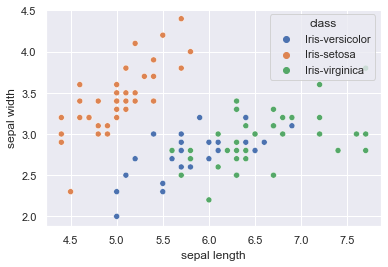

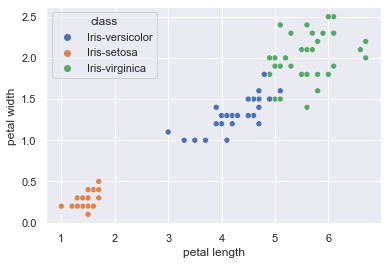

In [4]:
# plot train data based on for each pair of features and classes
sns.scatterplot(data = sepal_data, x = "sepal length", y = "sepal width", hue = "class")
plt.show()
sns.scatterplot(data = petal_data, x = "petal length", y = "petal width", hue = "class")
plt.show()

In [5]:
plt.rcParams["figure.figsize"] = (24,17)

# it creates mesh for coloring the backgroud of plot for SVMs
def MakeMeshgrid(x, y, h=.01):
    x_min, x_max = x.min() - 2, x.max() + 2
    y_min, y_max = y.min() - 2, y.max() + 2
    x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return x, y

# it plots contours for predicted data using trained models
def PlotContours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# it gives a model and plot the predictions areas
def PlotSVM(title,x_label,y_label,X_train,Y_train,clf,ax):  
    # create mesh grid
    X0, X1 = X_train[:, 0],X_train[:, 1]
    xx, yy = MakeMeshgrid(X0, X1)
    
    #plot contours
    PlotContours(ax, clf, xx, yy, cmap=plt.cm.terrain, alpha=0.8)
    
    # plot points of data
    ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.terrain, s=50, edgecolors='k')
    
    #update properties of plot
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
    #return plotted graph
    return ax
    
    


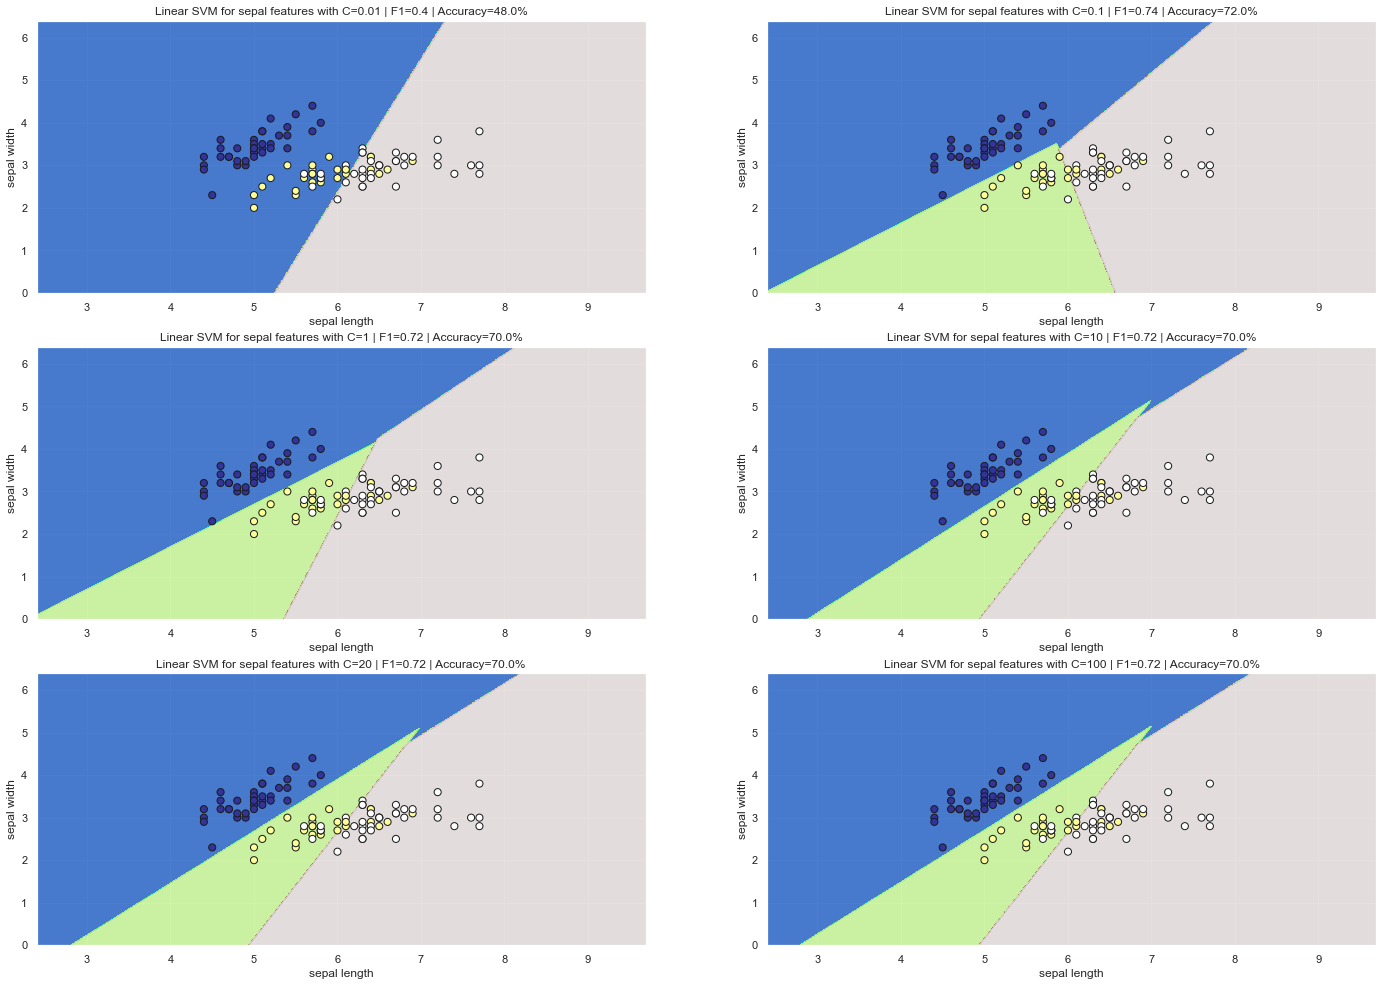

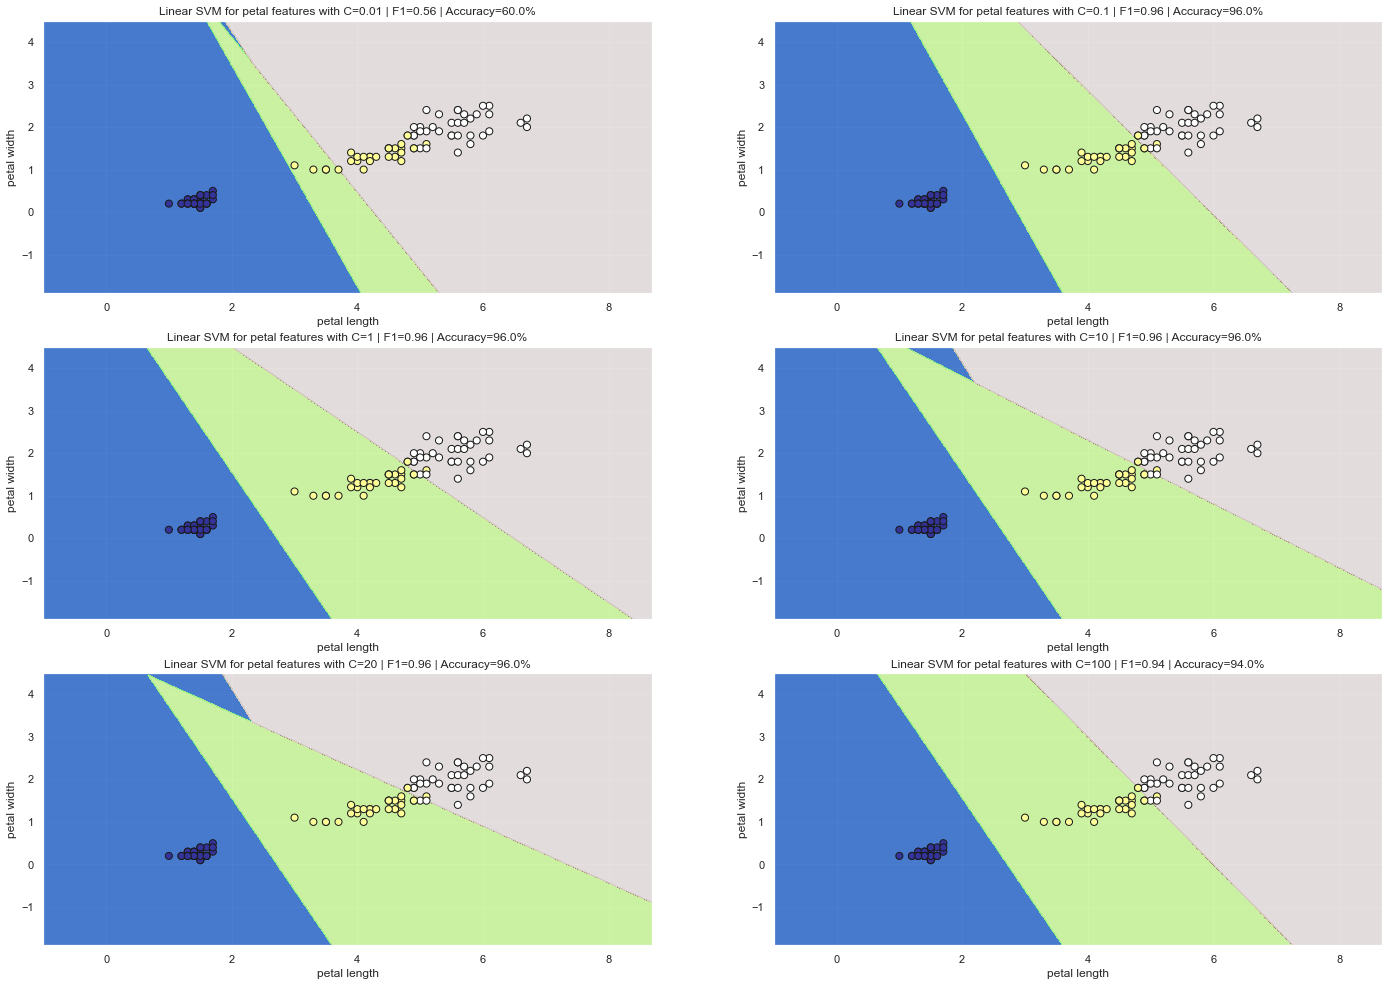

In [6]:
# a function to train and plot and calculate metrics for Linear SVMs
def PlotLinearSVMs():
    # assume the parameters
    Cs = [0.01,0.1,1,10,20,100]
    
    # creates multiple plots to show them in one image
    fig, axs = plt.subplots(3,2)
    axs = np.reshape(axs,(6,))
    index = 0
    
    #plotting for sepal pair of features
    for c in Cs :
        # create model
        clf = SVC(kernel="linear",C=c)
        X_train = np.array(sepal_data[["sepal length","sepal width"]])
        Y_train = np.array(sepal_data["class"].apply(lambda x : SetLabel(x)))

        X_test = np.array(test_data[["sepal length","sepal width"]])
        Y_test = np.array(test_data["class"].apply(lambda x : SetLabel(x)))
        
        # train and predict test data
        clf.fit(X_train,Y_train)  
        pre = clf.predict(X_test)
        
        # calculate metrics
        f1= round(f1_score(Y_test,pre,average="macro"),2)
        acc = round(accuracy_score(Y_test,pre)*100,2)
        
        # plotting
        title = "Linear SVM for sepal features with C={0} | F1={1} | Accuracy={2}%".format(c,f1,acc)
        x_label = "sepal length"
        y_label = "sepal width"
        axs[index]=PlotSVM(title,x_label,y_label,X_train,Y_train,clf,axs[index])
        index+=1  
    #showing all plots that generated    
    plt.show()
    
    # creates multiple plots to show them in one image
    fig, axs = plt.subplots(3,2)
    axs = np.reshape(axs,(6,))
    index = 0
    
    #plotting for petal pair of features
    for c in Cs : 
        # create model
        clf = SVC(kernel="linear",C=c)
        X_train = np.array(petal_data[["petal length","petal width"]])
        Y_train = np.array(petal_data["class"].apply(lambda x : SetLabel(x)))

        X_test = np.array(test_data[["petal length","petal width"]])
        Y_test = np.array(test_data["class"].apply(lambda x : SetLabel(x)))

        # train and predict test data
        clf.fit(X_train,Y_train)  
        pre = clf.predict(X_test)

        # calculate metrics
        f1= round(f1_score(Y_test,pre,average="macro"),2)
        acc = round(accuracy_score(Y_test,pre)*100,2)

        # plotting
        title = "Linear SVM for petal features with C={0} | F1={1} | Accuracy={2}%".format(c,f1,acc)
        x_label = "petal length"
        y_label = "petal width"
        axs[index]=PlotSVM(title,x_label,y_label,X_train,Y_train,clf,axs[index])
        index+=1
        
    #showing all plots that generated    
    plt.show()

PlotLinearSVMs()

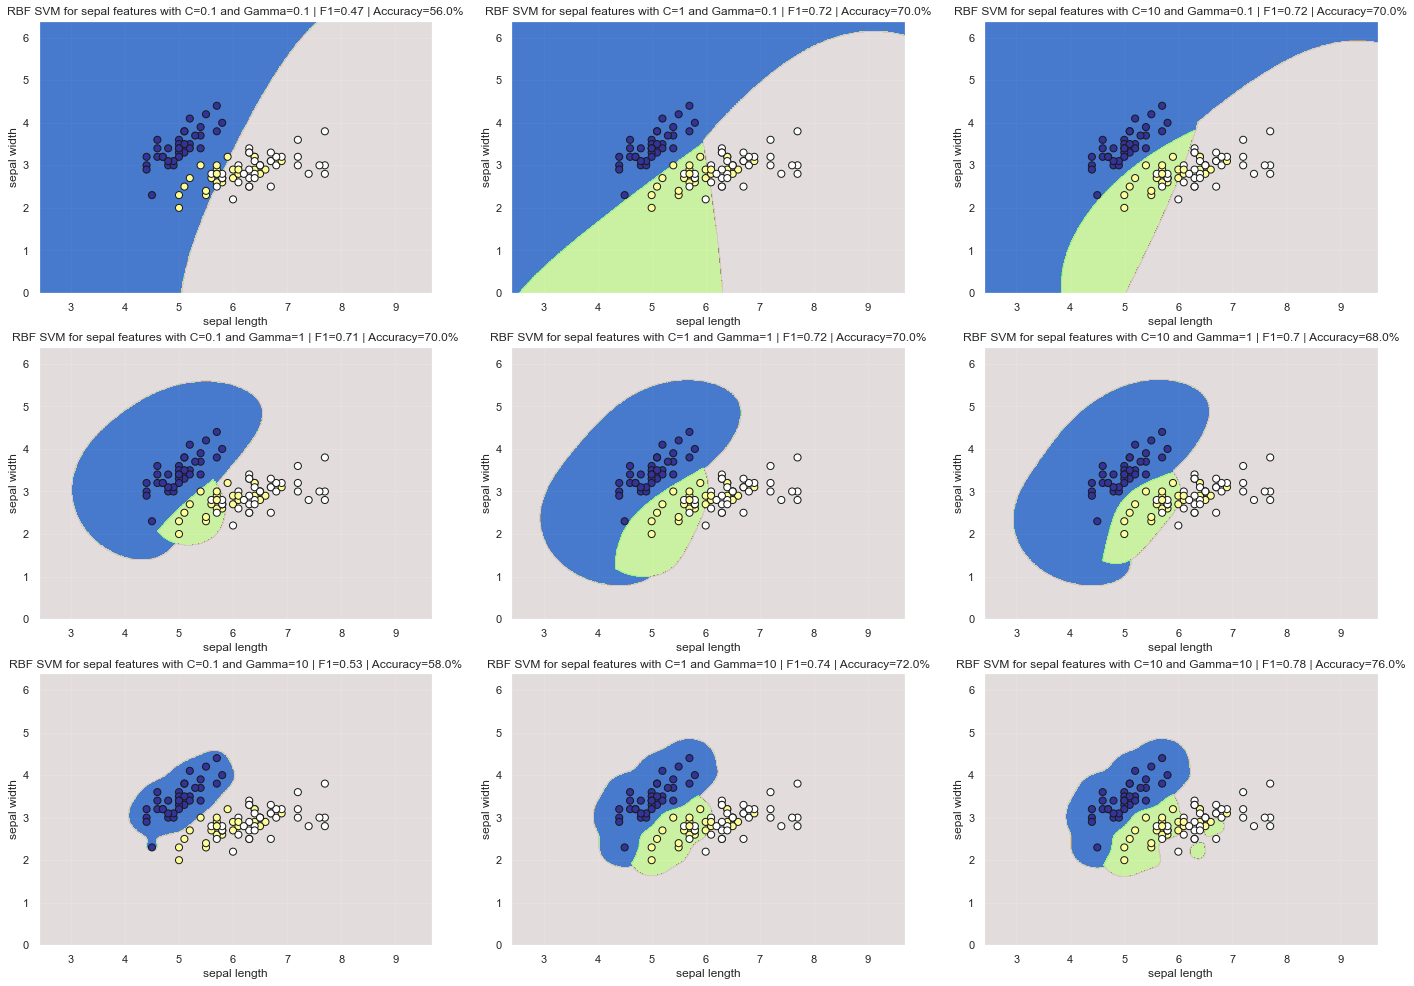

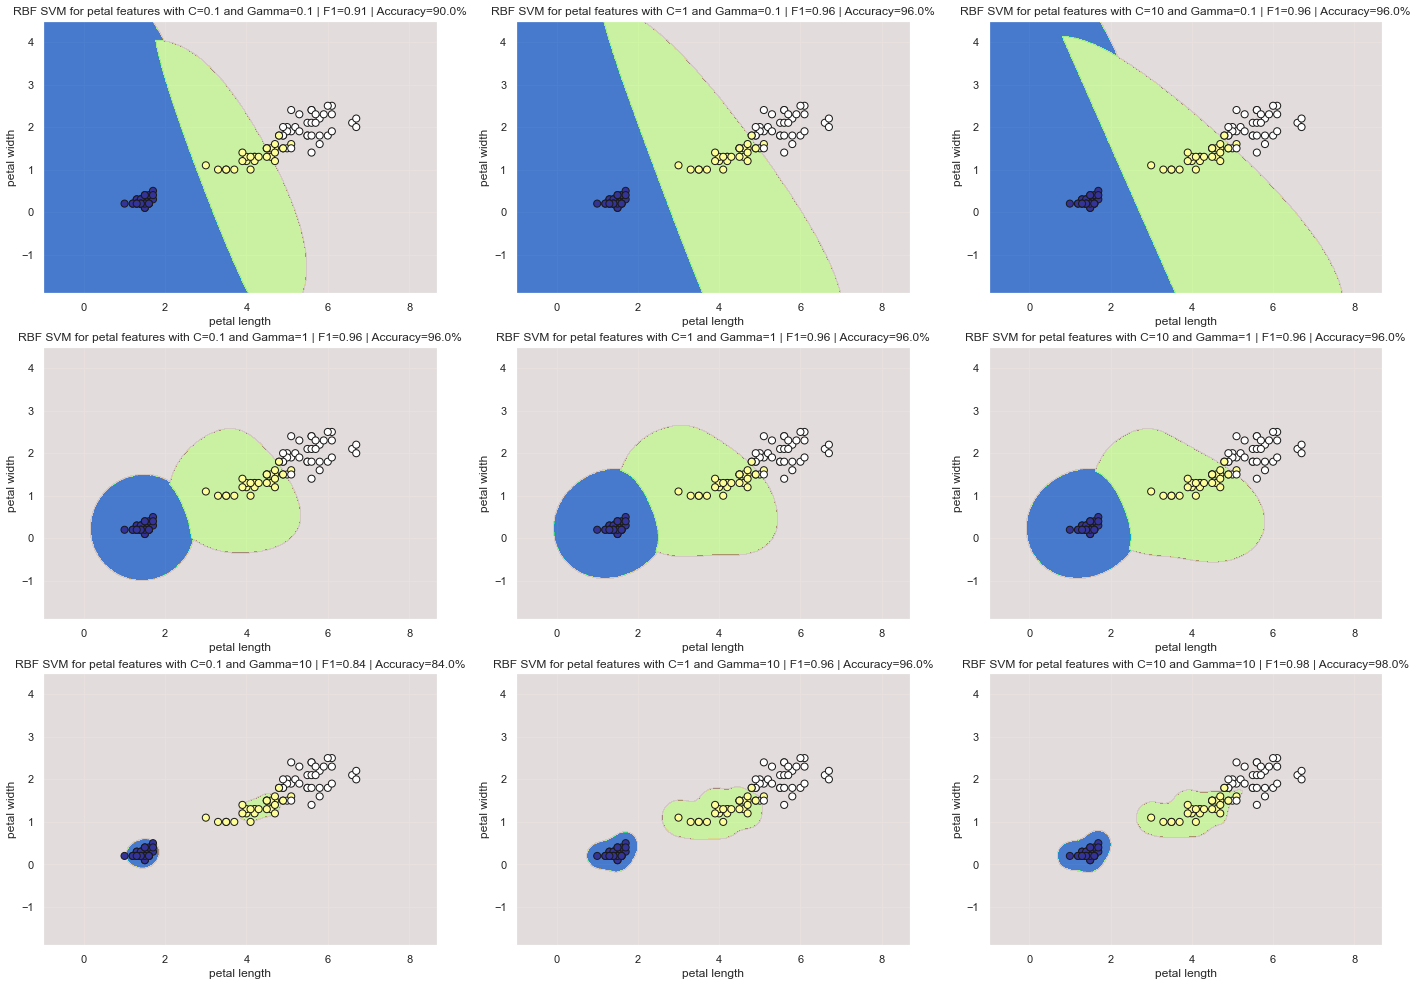

In [7]:
# a function to train and plot and calculate metrics for RFB SVMs
def PlotRFBSVMs():
    # assume the parameters
    gamma = [0.1,1,10]
    Cs = [0.1,1,10]
    
    # creates multiple plots to show them in one image
    fig, axs = plt.subplots(3,3)
    axs = np.reshape(axs,(9,))
    index = 0
    
    #plotting for sepal pair of features
    for gam in gamma:
        for c in Cs :  
            # create model
            clf = SVC(kernel="rbf",C=c,gamma=gam)
            X_train = np.array(sepal_data[["sepal length","sepal width"]])
            Y_train = np.array(sepal_data["class"].apply(lambda x : SetLabel(x)))

            X_test = np.array(test_data[["sepal length","sepal width"]])
            Y_test = np.array(test_data["class"].apply(lambda x : SetLabel(x)))

            # train and predict test data
            clf.fit(X_train,Y_train)  
            pre = clf.predict(X_test)

            # calculate metrics
            f1= round(f1_score(Y_test,pre,average="macro"),2)
            acc = round(accuracy_score(Y_test,pre)*100,2)

            # plotting
            title = "RBF SVM for sepal features with C={0} and Gamma={3} | F1={1} | Accuracy={2}%".format(c,f1,acc,gam)
            x_label = "sepal length"
            y_label = "sepal width"
            axs[index]=PlotSVM(title,x_label,y_label,X_train,Y_train,clf,axs[index])
            index+=1
    #showing all plots that generated  
    plt.show()
    
    # creates multiple plots to show them in one image
    fig, axs = plt.subplots(3,3)
    axs = np.reshape(axs,(9,))
    index = 0 
    
    #plotting for petal pair of features
    for gam in gamma:
        for c in Cs :   
            # create model
            clf = SVC(kernel="rbf",C=c,gamma=gam)
            X_train = np.array(petal_data[["petal length","petal width"]])
            Y_train = np.array(petal_data["class"].apply(lambda x : SetLabel(x)))

            X_test = np.array(test_data[["petal length","petal width"]])
            Y_test = np.array(test_data["class"].apply(lambda x : SetLabel(x)))

            # train and predict test data
            clf.fit(X_train,Y_train)  
            pre = clf.predict(X_test)

            # calculate metrics
            f1= round(f1_score(Y_test,pre,average="macro"),2)
            acc = round(accuracy_score(Y_test,pre)*100,2)

            # plotting
            title = "RBF SVM for petal features with C={0} and Gamma={3} | F1={1} | Accuracy={2}%".format(c,f1,acc,gam)
            x_label = "petal length"
            y_label = "petal width"
            axs[index]=PlotSVM(title,x_label,y_label,X_train,Y_train,clf,axs[index])
            index+=1
    #showing all plots that generated  
    plt.show()
PlotRFBSVMs()

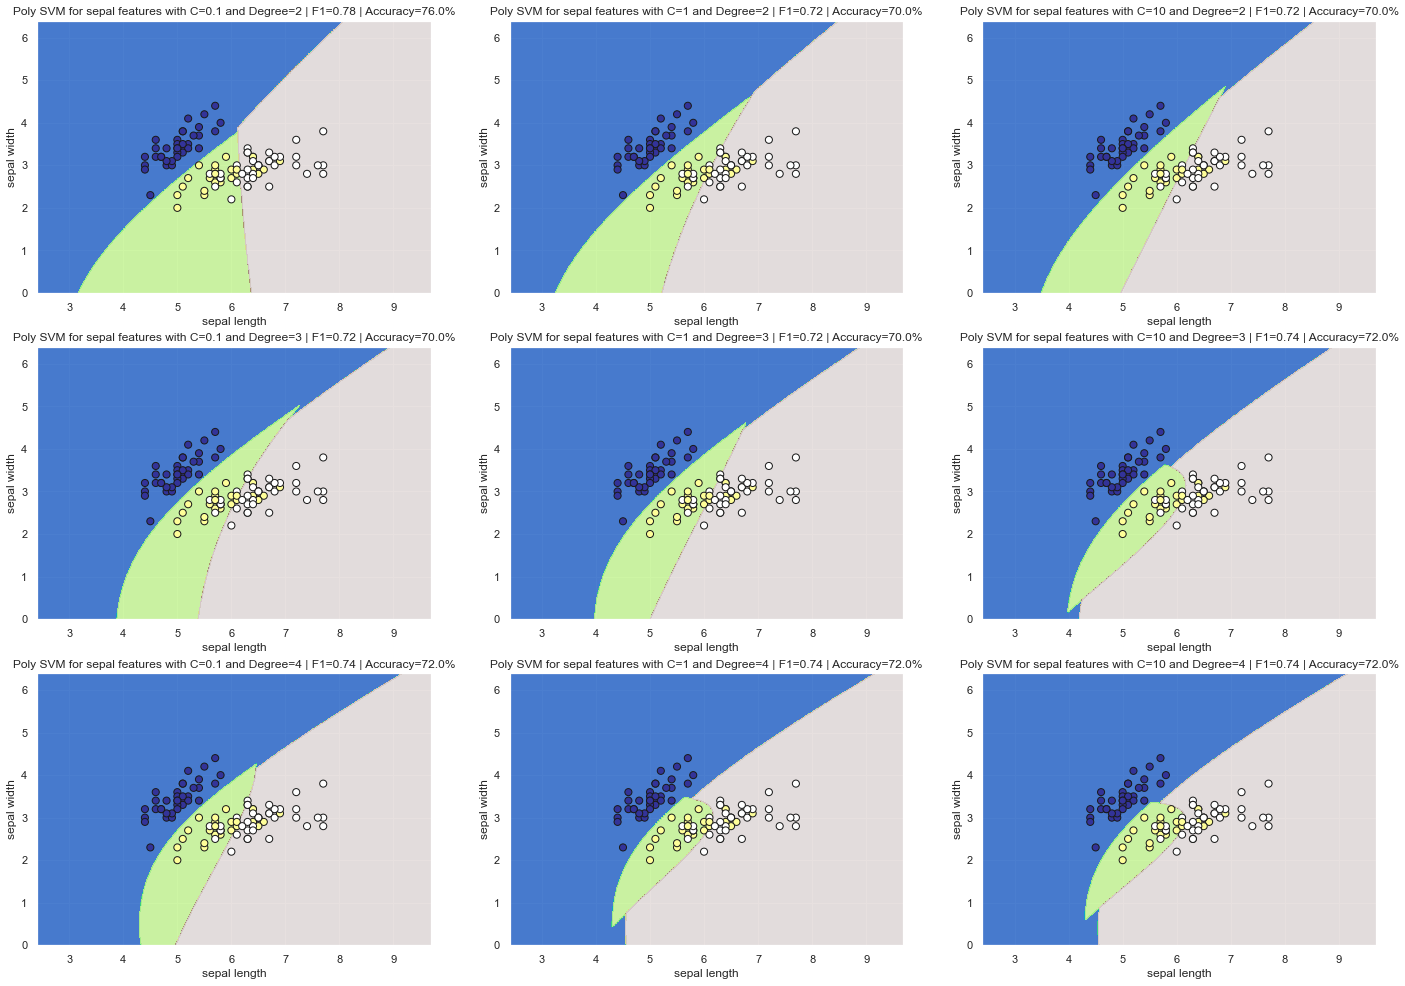

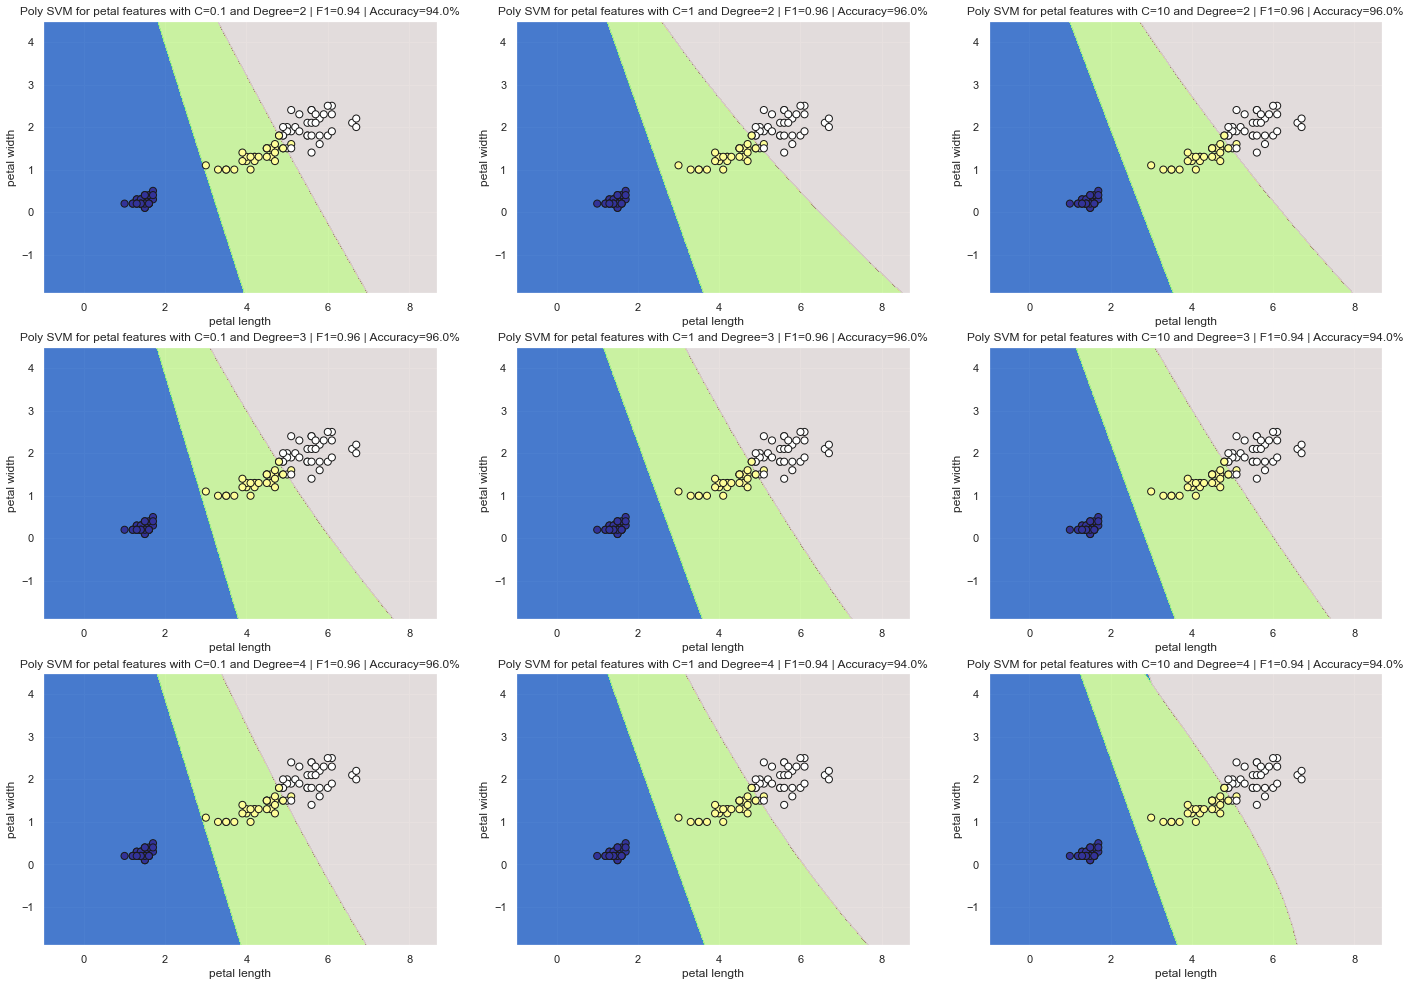

In [8]:
# a function to train and plot and calculate metrics for Poly SVMs
def PlotPolySVMs():
    # assume the parameters
    Cs = [0.1,1,10]
    Deg = [2,3,4]
    
    # creates multiple plots to show them in one image
    fig, axs = plt.subplots(3,3)
    axs = np.reshape(axs,(9,))
    index = 0
    
    #plotting for sepal pair of features
    for deg in Deg:
        for c in Cs :  
            # create model
            clf = SVC(kernel="poly",C=c,degree=deg)
            X_train = np.array(sepal_data[["sepal length","sepal width"]])
            Y_train = np.array(sepal_data["class"].apply(lambda x : SetLabel(x)))

            X_test = np.array(test_data[["sepal length","sepal width"]])
            Y_test = np.array(test_data["class"].apply(lambda x : SetLabel(x)))

            # train and predict test data
            clf.fit(X_train,Y_train)  
            pre = clf.predict(X_test)

            # calculate metrics
            f1= round(f1_score(Y_test,pre,average="macro"),2)
            acc = round(accuracy_score(Y_test,pre)*100,2)

            # plotting
            title = "Poly SVM for sepal features with C={0} and Degree={3} | F1={1} | Accuracy={2}%".format(c,f1,acc,deg)
            x_label = "sepal length"
            y_label = "sepal width"
            axs[index]=PlotSVM(title,x_label,y_label,X_train,Y_train,clf,axs[index])
            index+=1
    #showing all plots that generated  
    plt.show()
    
    # creates multiple plots to show them in one image
    fig, axs = plt.subplots(3,3)
    axs = np.reshape(axs,(9,))
    index = 0    
    
    #plotting for petal pair of features
    for deg in Deg:
        for c in Cs :    
            # create model
            clf = SVC(kernel="poly",C=c,degree=deg)
            X_train = np.array(petal_data[["petal length","petal width"]])
            Y_train = np.array(petal_data["class"].apply(lambda x : SetLabel(x)))

            X_test = np.array(test_data[["petal length","petal width"]])
            Y_test = np.array(test_data["class"].apply(lambda x : SetLabel(x)))

            # train and predict test data
            clf.fit(X_train,Y_train)  
            pre = clf.predict(X_test)

            # calculate metrics
            f1= round(f1_score(Y_test,pre,average="macro"),2)
            acc = round(accuracy_score(Y_test,pre)*100,2)

            # plotting
            title = "Poly SVM for petal features with C={0} and Degree={3} | F1={1} | Accuracy={2}%".format(c,f1,acc,deg)
            x_label = "petal length"
            y_label = "petal width"
            axs[index]=PlotSVM(title,x_label,y_label,X_train,Y_train,clf,axs[index])
            index+=1
    #showing all plots that generated  
    plt.show()
    
    
PlotPolySVMs()

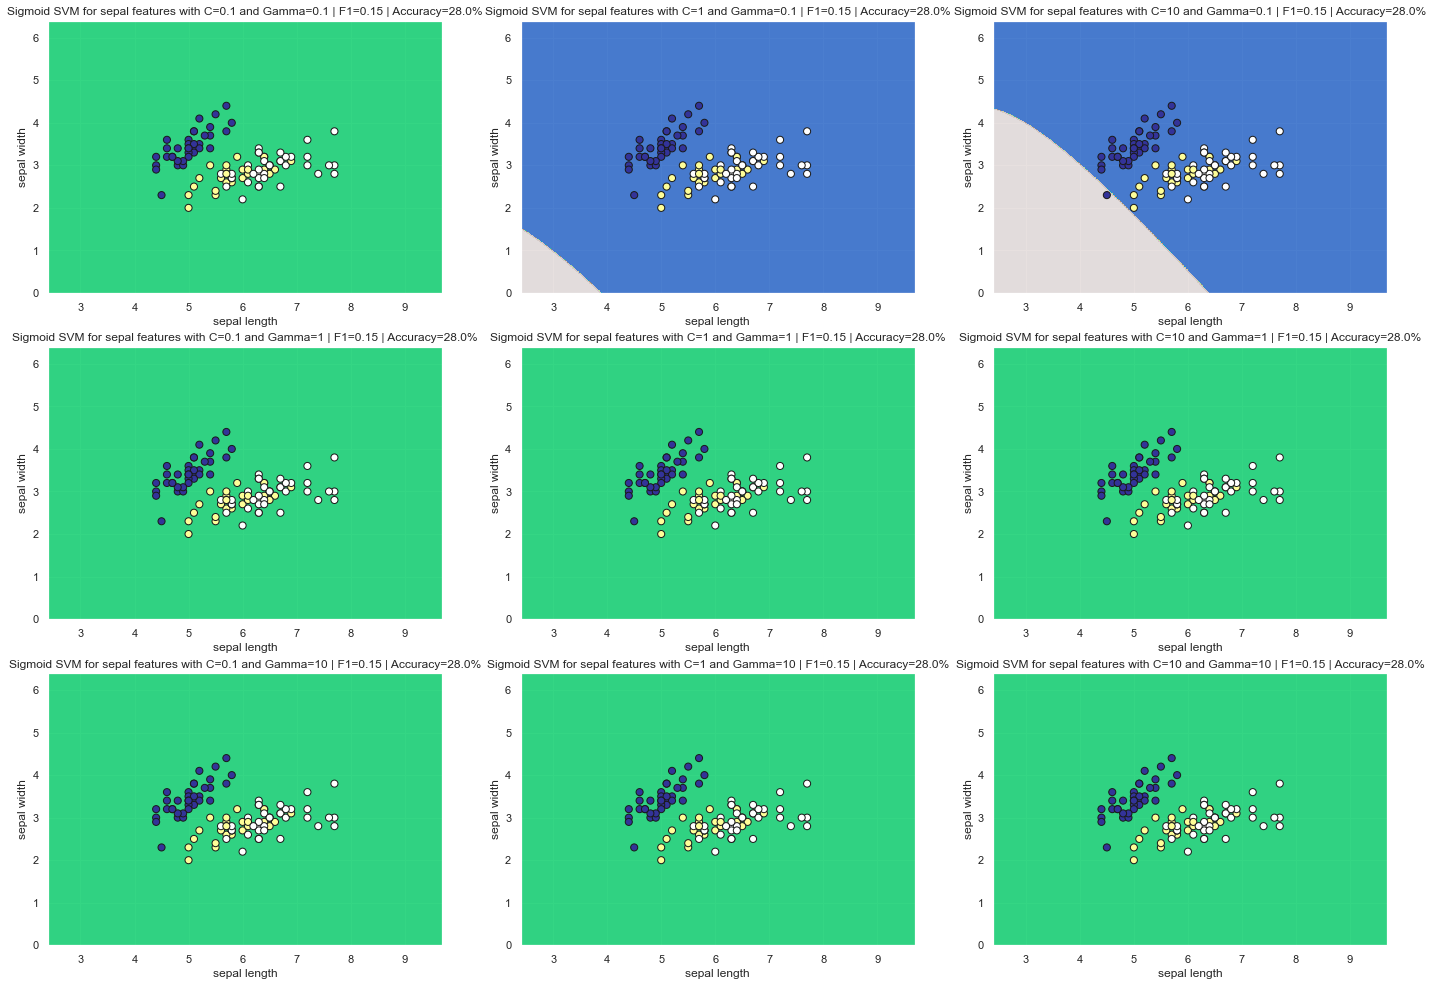

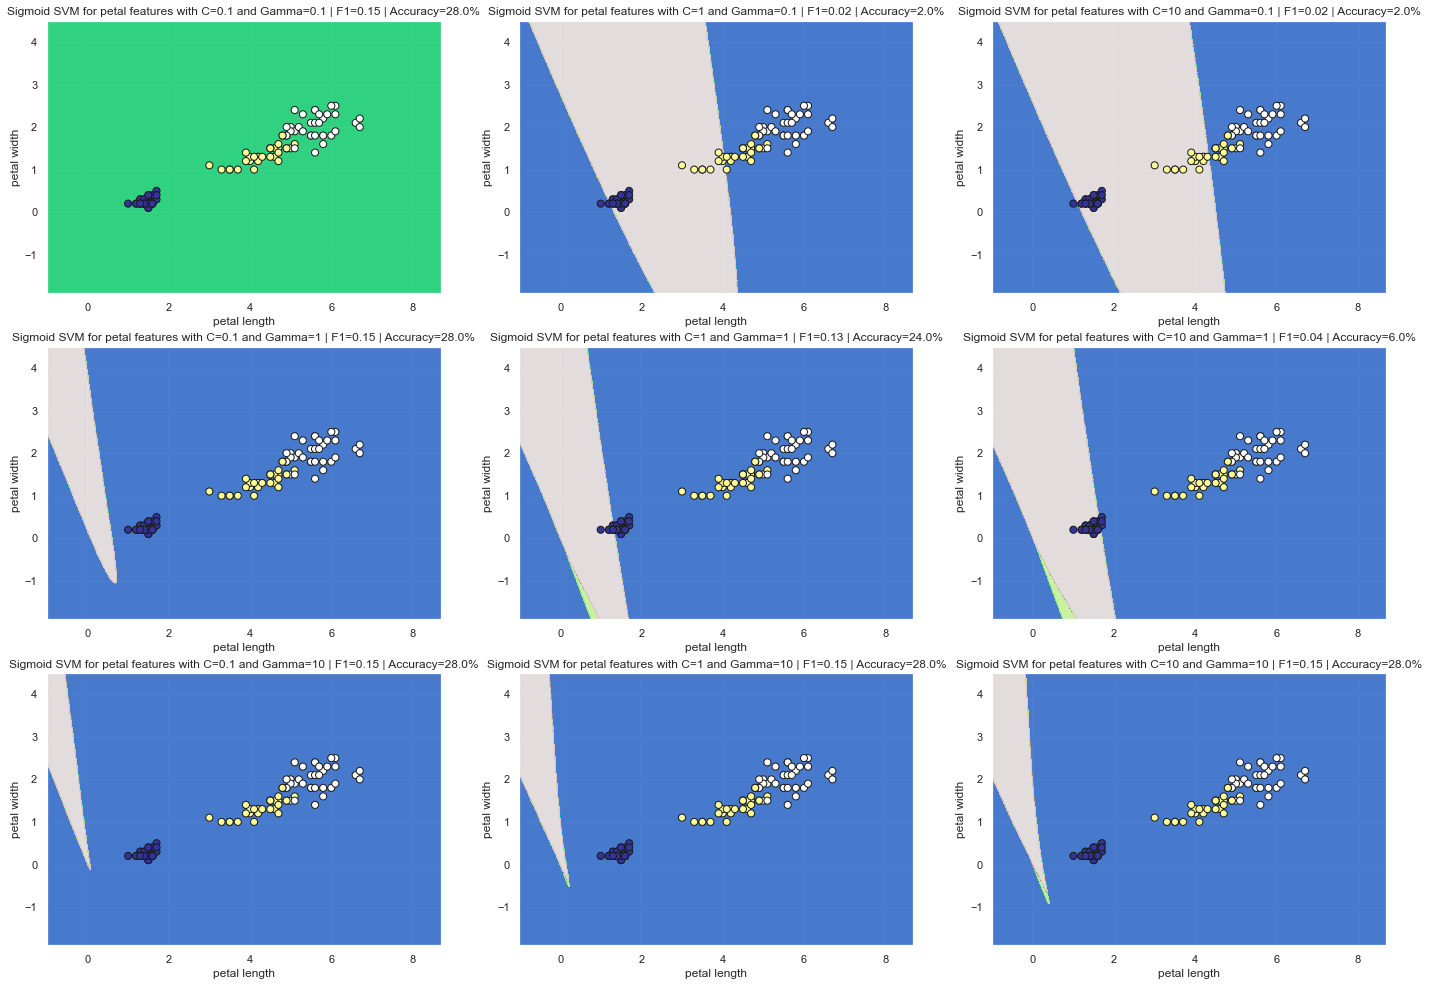

In [9]:
# a function to train and plot and calculate metrics for Sigmoid SVMs
def PlotSigmoidSVMs():
    # assume the parameters
    gamma = [0.1,1,10]
    Cs = [0.1,1,10]
    
    # creates multiple plots to show them in one image
    fig, axs = plt.subplots(3,3)
    axs = np.reshape(axs,(9,))
    index = 0
    
    #plotting for sepal pair of features
    for gam in gamma:
        for c in Cs :   
            # create model
            clf = SVC(kernel="sigmoid",C=c,gamma=gam)
            X_train = np.array(sepal_data[["sepal length","sepal width"]])
            Y_train = np.array(sepal_data["class"].apply(lambda x : SetLabel(x)))

            X_test = np.array(test_data[["sepal length","sepal width"]])
            Y_test = np.array(test_data["class"].apply(lambda x : SetLabel(x)))

            # train and predict test data
            clf.fit(X_train,Y_train)  
            pre = clf.predict(X_test)

            # calculate metrics
            f1= round(f1_score(Y_test,pre,average="macro"),2)
            acc = round(accuracy_score(Y_test,pre)*100,2)

            # plotting
            title = "Sigmoid SVM for sepal features with C={0} and Gamma={3} | F1={1} | Accuracy={2}%".format(c,f1,acc,gam)
            x_label = "sepal length"
            y_label = "sepal width"
            axs[index] = PlotSVM(title,x_label,y_label,X_train,Y_train,clf,axs[index])
            index+=1
    #showing all plots that generated  
    plt.show()
    
    # creates multiple plots to show them in one image
    fig, axs = plt.subplots(3,3)
    axs = np.reshape(axs,(9,))
    index = 0   
    
    #plotting for petal pair of features
    for gam in gamma:
        for c in Cs :  
            # create model
            clf = SVC(kernel="sigmoid",C=c,gamma=gam)
            X_train = np.array(petal_data[["petal length","petal width"]])
            Y_train = np.array(petal_data["class"].apply(lambda x : SetLabel(x)))

            X_test = np.array(test_data[["petal length","petal width"]])
            Y_test = np.array(test_data["class"].apply(lambda x : SetLabel(x)))

            # train and predict test data
            clf.fit(X_train,Y_train)  
            pre = clf.predict(X_test)

            # calculate metrics
            f1= round(f1_score(Y_test,pre,average="macro"),2)
            acc = round(accuracy_score(Y_test,pre)*100,2)

            # plotting
            title = "Sigmoid SVM for petal features with C={0} and Gamma={3} | F1={1} | Accuracy={2}%".format(c,f1,acc,gam)
            x_label = "petal length"
            y_label = "petal width"
            axs[index] = PlotSVM(title,x_label,y_label,X_train,Y_train,clf,axs[index])
            index+=1
    #showing all plots that generated  
    plt.show()
    
    
PlotSigmoidSVMs()